# Intro to Convolution Neural Network

## What is Convolution ? - brief

In machine learning, a convolutional neural network is a class of deep, feed-forward artificial neural networks, most commonly applied to analyzing visual imagery. CNNs use a variation of multilayer perceptrons designed to require minimal preprocessing.

## What inspired Convolutional Networks?

CNNs are biologically-inspired models inspired by research by D. H. Hubel and T. N. Wiesel. They proposed an explanation for the way in which mammals visually perceive the world around them using a layered architecture of neurons in the brain, and this in turn inspired engineers to attempt to develop similar pattern recognition mechanisms in computer vision.

In their hypothesis, within the visual cortex, complex functional responses generated by "complex cells" are constructed from more simplistic responses from "simple cells'.

For instances, simple cells would respond to oriented edges etc, while complex cells will also respond to oriented edges but with a degree of spatial invariance.

Receptive fields exist for cells, where a cell responds to a summation of inputs from other local cells.

The architecture of deep convolutional neural networks was inspired by the ideas mentioned above

- local connections
- layering
- spatial invariance (shifting the input signal results in an equally shifted output signal. , most of us are able to recognize specific faces under a variety of conditions because we learn abstraction These abstractions are thus invariant to size, contrast, rotation, orientation.

However, it remains to be seen if these computational mechanisms of convolutional neural networks are similar to the computation mechanisms occurring in the primate visual system

- convolution operation
- shared weights
- pooling/subsampling

## How does it work? 

![CNN Layer wise structure](assets/cnn_layer1.jpg)
<br>
<bold>You can see how an image is being restructured in each layer to get useful features out of an image</bold>
<br>
![CNN what happens to a pixels window](assets/cnn_layer2.jpg)



## Creating a Convolution Neural network

###### We are gonna create a convolution neural network to classify whether there is cat or a dog in a given image

### Step1 - Prepare the dataset of Images

What exactly would data contain

![RGB channel](assets/rgb.webp)

- Every image is a matrix of pixel values. 
- The range of values that can be encoded in each pixel depends upon its bit size. 
- Most commonly, we have 8 bit or 1 Byte-sized pixels. Thus the possible range of values a single pixel can represent is [0, 255]. 
- However, with coloured images, particularly RGB (Red, Green, Blue)-based images, the presence of separate colour channels (3 in the case of RGB images) introduces an additional ‘depth’ field to the data, making the input 3-dimensional. 
- Hence, for a given RGB image of size, say 255×255 (Width x Height) pixels, we’ll have 3 matrices associated with each image, one for each of the colour channels. 
- Thus the image in it’s entirety, constitutes a 3-dimensional structure called the Input Volume (255x255x3).

In [49]:

import cv2
import numpy as np
nrml = False


In [50]:
# let us load the data
import pickle

with open('data/data.pickle', 'rb') as h:
    pkl_data = pickle.load(h)
print(pkl_data.keys())
x_train = pkl_data['x_train']
y_train = pkl_data['y_train']
x_test = pkl_data['x_test']
y_test = pkl_data['y_test']

dict_keys(['x_train', 'y_train', 'x_test', 'y_test'])


In [51]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
%matplotlib inline 

In [52]:
print("train images shape {}, test images shape{}".format(x_train.shape, x_test.shape))
print("train labels shape {}, test labels shape{}".format(y_train.shape, y_test.shape))

train images shape (18706, 64, 64, 3), test images shape(6240, 64, 64, 3)
train labels shape (18706, 2), test labels shape(6240, 2)


## Step 2 - Visualization
Take a look at what kind of data you have.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

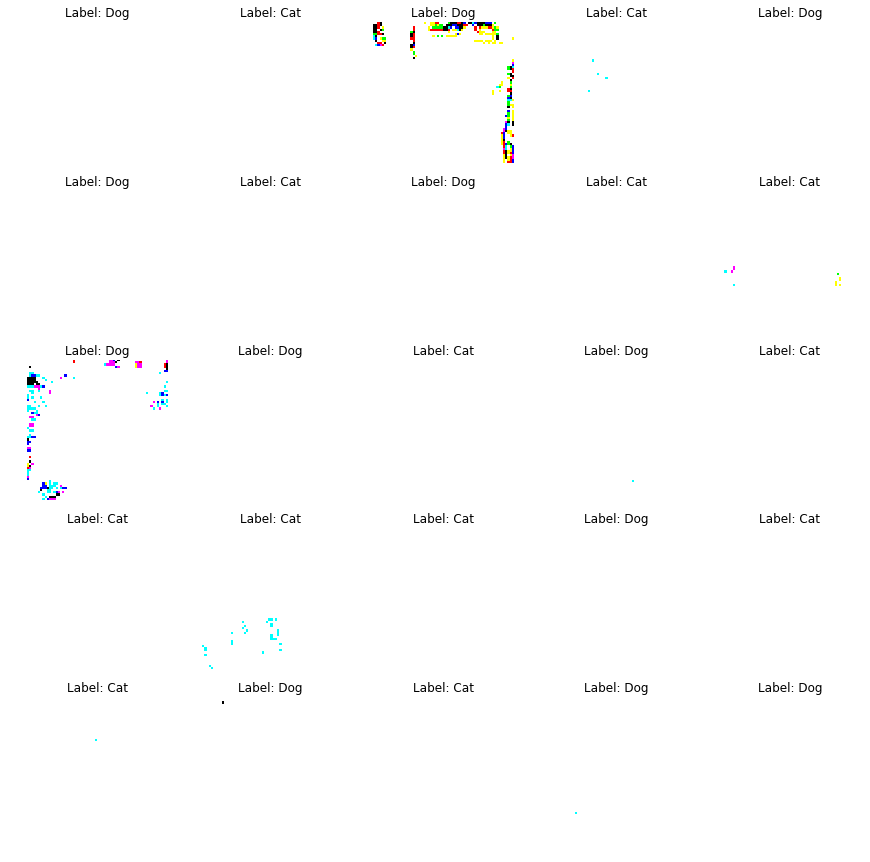

In [53]:
# lets look at some of our pictures

def show_images():
    f, ax = plt.subplots(5, 5, figsize=(15,15))
    for i in range(len(x_train[:25])):
        label = y_train[i]
        img = x_train[i]
        
        if label[0]  == 1: 
            str_label='Dog'
        else:
            str_label='Cat'
            
        ax[i//5, i%5].imshow(img)
        ax[i//5, i%5].axis('off')
        ax[i//5, i%5].set_title("Label: {}".format(str_label))
    plt.show()
        
show_images()

## Step 3 - Normalization and LabelEncoding
Another important thing in Neural networks is normalizing and feature scaling that is bringing all the values in X to a comparable state.
<br>
Here we will transform each **pixel value to lie between 0 to 1** by dividing each pixel by 255.
We have already done label encoding or one hot encoding in this case. If the images is of dog make label for that index as [0,1] else if it is dog make it as [1,0].

In [54]:
# Normalization
if nrml == False:
    x_train = x_train/255
    x_test = x_test/255
    nrml = True

In [55]:
# Now check the values of each pixels
x_train[0]

array([[[0.5176471 , 0.42352942, 0.39215687],
        [0.3372549 , 0.32941177, 0.30980393],
        [0.32941177, 0.39215687, 0.3764706 ],
        ...,
        [0.5803922 , 0.5764706 , 0.57254905],
        [0.57254905, 0.5647059 , 0.56078434],
        [0.5568628 , 0.54901963, 0.54509807]],

       [[0.47058824, 0.38039216, 0.34901962],
        [0.28627452, 0.27450982, 0.25490198],
        [0.3137255 , 0.3764706 , 0.3647059 ],
        ...,
        [0.6039216 , 0.6       , 0.59607846],
        [0.59607846, 0.5882353 , 0.58431375],
        [0.58431375, 0.5764706 , 0.57254905]],

       [[0.5058824 , 0.41568628, 0.38431373],
        [0.32156864, 0.3137255 , 0.29411766],
        [0.34509805, 0.4117647 , 0.39607844],
        ...,
        [0.62352943, 0.6156863 , 0.6117647 ],
        [0.6117647 , 0.6039216 , 0.6       ],
        [0.59607846, 0.5882353 , 0.58431375]],

       ...,

       [[0.49411765, 0.50980395, 0.5254902 ],
        [0.50980395, 0.52156866, 0.5411765 ],
        [0.5294118 , 0

## Step 4 - Creating out Model
### But before that lets dive into the components of CNN Architecture
CNN’s make use of filters (also known as kernels), to detect what features, such as edges, are present throughout an image. A filter is just a matrix of values, called weights, that are trained to detect specific features. The filter moves over each part of the image to check if the feature it is meant to detect is present. To provide a value representing how confident it is that a specific feature is present, the filter carries out a convolution operation, which is an element-wise product and sum between two matrices. 


**Z = matrix_mutl(W,X) + b**

What would be the shape of next layer is governed by this formula - 
![Formula](assets/formula.png)

Where ,
n - previous layer size
s- strides
f- filter size


![SegmentLocal](assets/convolve.gif)

Other operations or layers involved in Convolution Neural Network architecture are - 
- **Pooling** - Pooling Layer. It is common to periodically insert a Pooling layer in-between successive Conv layers in a ConvNet architecture. Its function is to progressively reduce the spatial size of the representation to reduce the amount of parameters and computation in the network, and hence to also control overfitting.

![SegmentLocal](assets/maxpooling.gif)

- **Fully Connected Layer** - The output from the convolutional layers represents high-level features in the data. While that output could be flattened and connected to the output layer, adding a fully-connected layer is a (usually) cheap way of learning non-linear combinations of these features.

In [113]:
# Creating out model 
# We will be using keras to create this neural network model
# import keras required  modules
import keras
import tensorflow as tf
config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 4} ) 
sess = tf.Session(config=config) 
keras.backend.set_session(sess)
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Conv2D, MaxPooling2D, Dense, Activation
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import np_utils

In [68]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

### CatdogNet-16
A scaled down version of the VGG-16, with a few notable changes.

- Number of convolution filters cut in half, fully connected (dense) layers scaled down.
- Optimizer changed to RMSprop.
- Output layer activation set to sigmoid for binary crossentropy.
- Some layers commented out for efficiency.

In [121]:
optimizer = 'sgd'
objective = 'categorical_crossentropy'
ROWS = 64
COLS = 64


def catdog():
    
    model = Sequential()

    model.add(Conv2D(32, (3, 3), input_shape=(ROWS, COLS, 3), activation='relu'))
    model.add(Conv2D(32,(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3),  activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(Conv2D(128, (3, 3),  activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(256, (3, 3), activation='relu'))
#     model.add(Conv2D(256, (3, 3),  activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(2))
    model.add(Activation('sigmoid'))

    model.compile(loss=objective, optimizer=optimizer, metrics=['accuracy'])
    return model

In [122]:
model = catdog()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_72 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 26, 26, 64)        36928     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 11, 11, 128)       73856     
__________

## Training and Predict

In [137]:
nb_epoch = 50
batch_size = 16

In [138]:
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=7, verbose=1, mode='auto')
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epoch,
          validation_split=0.25, verbose=0, shuffle=True, callbacks=[early_stopper])


# model.evaluate(x_test, y_test)

In [141]:
def visualise_history(history):
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'validation'], loc='upper left')
        plt.show()
        # summarize history for loss
        plt.plot(history.history['acc'])
        plt.plot(history.history['val_acc'])
        plt.title('model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'validation'], loc='upper left')
        plt.show()

In [145]:
visualise_history(history)

In [146]:
model.evaluate(x_test, y_test)